In [1]:
%%capture
%pip install numpy
%pip install matplotlib
%pip install scipy
%pip install ipywidgets

# Distinguishing Different Targets

To distinguish different targets, we need to determine the time it takes for a signal to be returned from the time it was emitted.

Take $t$ to be the time it takes for a signal to be received from the time it was emittted,
since electromagnetic waves travels at the speed of light $~3\times 10^8$

## Chirp Signal

Chirp signals are defined as $s(t) = sin(2\pi f_ct+\pi\gamma t_c^2)$ <br>
Where,
$f_c$ is the central frequency of a signal,
$\gamma$ is $\frac{Bandwidth}{Pulsewidth}$

For simplicity Bandwidth is written in shorthand $BW$ and Pulsewidth $T_p$.

We can also rewrite the Chirp signal after substituting $\gamma$ to <br>
$s(t) = sin(2\pi f_ct+ \pi \gamma (t-\frac{T_p}{2})^2)$ 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp
from ipywidgets import interactive, FloatSlider, IntSlider

In [3]:
# Sample Chirp Sinusoid Wave
def plot_chirp_sinusoid(amplitude=1.0, 
                        frequency=1.0, 
                        pulse_width=1.0, # The total time of a pulse
                        bandwidth=1.0,
                        sampling_frequency=10000, 
                        axis_limit=2):
    
    # Plot time axis starts from 0 as per time domain
    Ns = pulse_width*sampling_frequency
    t = np.arange(Ns) / sampling_frequency
    # t = np.linspace(0, pulse_width, 1/sampling_frequency)

    gamma = bandwidth/pulse_width     # A constant 
    quadratic_phase = np.pi * gamma * (t - pulse_width/2)**2 # quadratic phase shift required for chirp

    y = amplitude * np.sin( 2 * np.pi * frequency * t + quadratic_phase)
    

    next_pow2 = lambda n: 1 if n <= 1 else 2**(n - 1).bit_length()

    nfft = next_pow2(int(Ns))
    print(Ns)
    print(nfft)
    
    # Perform fast fourier transform (In complex domain)
    fft = np.fft.fft(y, nfft)          # Generate out the fast fourier signal
    fft = np.fft.fftshift(fft)   # Shift the signal to centre about zero (python wraps the signal) 
    fft = np.abs(fft)            # Find magnitude of signal so that we can plot the amplitude (because result is in complex)
    N = len(y)
    fft_freqs = np.fft.fftfreq(nfft, d=1/sampling_frequency)
    fft_freqs = np.fft.fftshift(fft_freqs)

    print(len(fft_freqs))

    # Plot of chirp wave
    plt.figure(figsize=(10, 4))
    plt.plot(t, y, label=f'{amplitude} sin(2* pi * {frequency}t + {quadratic_phase[0]})')
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.axvline(0, color='black', linestyle='--', linewidth=1)
    plt.title('Sinusoidal Wave')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plot of fft
    plt.figure(figsize=(10, 4))
    plt.plot(fft_freqs, fft, label=f'Fast Fourier Transform')
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.axvline(0, color='black', linestyle='--', linewidth=1)
    plt.title('Fast Fourier Transform Wave')
    plt.xlabel('Hz')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.show()

In [4]:
sliders = {
    "amplitude": FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0),
    "frequency": FloatSlider(min=0.1, max=5000.0, step=0.5, value=1.0),
    "pulse_width": FloatSlider(min=0.1, max=20.0, step=0.1, value=0.1),
    "sampling_frequency": IntSlider(min=1000, max=10000, step=1, value=1000),
    "bandwidth": FloatSlider(min=0, max=500.0, step=0.01, value=0.0),
}

ui = interactive(plot_chirp_sinusoid, **sliders)
display(ui)

interactive(children=(FloatSlider(value=1.0, description='amplitude', max=5.0, min=0.1), FloatSlider(value=1.0…

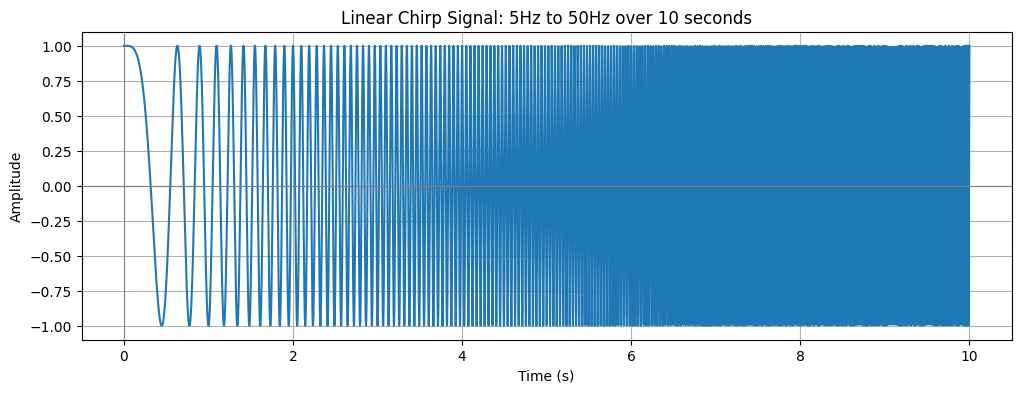

In [5]:
t = np.linspace(0, 10, 10000)

signal = chirp(t, f0=0, f1=50, t1=10, method='linear')

# Plot chirp signal
plt.figure(figsize=(12,4))
plt.plot(t, signal)
plt.title("Linear Chirp Signal: 5Hz to 50Hz over 10 seconds")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.axhline(0, color='grey', linewidth=0.8)
plt.axvline(0, color='grey', linewidth=0.8)
plt.show()
